# Match Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")



%matplotlib inline

## Data Cleaning and Exploration

In [2]:
matches = pd.read_csv("matches.csv" , index_col = "id")
matches = matches.iloc[:,:-3]

In [3]:
matches.shape

(756, 14)

In [9]:
dicti = {"Delhi Daredevils":"Delhi Capitals"}
matches["team1"]=matches["team1"].replace(dicti)
matches["team2"]=matches["team2"].replace(dicti)
matches["toss_winner"]=matches["toss_winner"].replace(dicti)
matches["winner"]=matches["winner"].replace(dicti)

In [32]:
matches.winner.unique()

array(['Sunrisers Hyderabad', 'Rising Pune Supergiant',
       'Kolkata Knight Riders', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Mumbai Indians', 'Delhi Capitals',
       'Gujarat Lions', 'Chennai Super Kings', 'Rajasthan Royals',
       'Deccan Chargers', 'Pune Warriors', 'Kochi Tuskers Kerala', nan,
       'Rising Pune Supergiants'], dtype=object)

## Taking in consideration only DC VS RCB

In [10]:
RD = matches[np.logical_or(np.logical_and(matches['team1']=='Delhi Capitals',matches['team2']=='Royal Challengers Bangalore'),
                            np.logical_and(matches['team2']=='Delhi Capitals',matches['team1']=='Royal Challengers Bangalore'))]

In [11]:
RD.head()

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
id,,,,,,,,,,,,,,
5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium
55,2017,Delhi,2017-05-14,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,10,0,HV Patel,Feroz Shah Kotla
76,2008,Delhi,2008-04-30,Delhi Capitals,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Delhi Capitals,10,0,GD McGrath,Feroz Shah Kotla
104,2008,Bangalore,2008-05-19,Royal Challengers Bangalore,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,5,SP Goswami,M Chinnaswamy Stadium
129,2009,Port Elizabeth,2009-04-26,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,bat,normal,0,Delhi Capitals,0,6,TM Dilshan,St George's Park


In [12]:
RD.shape

(23, 14)

In [13]:
RD.season.unique()

array([2017, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2018,
       2019], dtype=int64)

In [17]:
RD.isnull().sum()

season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             1
win_by_runs        0
win_by_wickets     0
player_of_match    1
venue              0
dtype: int64

In [18]:
RD.describe().iloc[:,2:].T

,count,mean,std,min,25%,50%,75%,max
win_by_runs,23.0,7.217391,10.121788,0.0,0.0,0.0,15.5,37.0
win_by_wickets,23.0,2.913043,3.369827,0.0,0.0,0.0,6.0,10.0


## HEAD TO HEAD

In [19]:
RD.groupby("winner")["winner"].count()

winner
Delhi Capitals                  8
Royal Challengers Bangalore    14
Name: winner, dtype: int64

Text(0.5, 1.0, 'DC VS RCB-head to head')

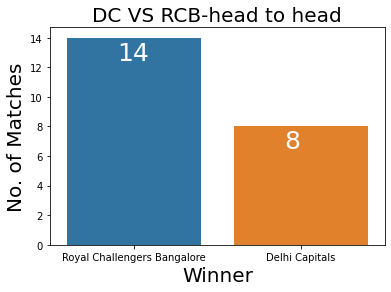

In [26]:
sns.countplot(RD["winner"])
plt.text(-0.1,12.5,str(RD['winner'].value_counts()['Royal Challengers Bangalore']),size=25,color='white')
plt.text(0.9,6.5,str(RD['winner'].value_counts()['Delhi Capitals']),size=25,color='white')
plt.xlabel('Winner',fontsize=20)
plt.ylabel('No. of Matches',fontsize=20)
plt.title('DC VS RCB-head to head',fontsize = 20)

In [27]:
Season_wise_Match_Winner = pd.DataFrame(RD.groupby(["season","winner"])["winner"].count())

Season_wise_Match_Winner.columns = ["winner count"]

print("Season wise winner of matches between DC VS RCB :")
Season_wise_Match_Winner

Season wise winner of matches between DC VS RCB :


winner count
season winner                                   
2008   Delhi Capitals                          2
2009   Delhi Capitals                          1
       Royal Challengers Bangalore             1
2010   Delhi Capitals                          2
2011   Royal Challengers Bangalore             1
2012   Royal Challengers Bangalore             2
2013   Royal Challengers Bangalore             2
2014   Royal Challengers Bangalore             2
2015   Royal Challengers Bangalore             1
2016   Delhi Capitals                          1
       Royal Challengers Bangalore             1
2017   Royal Challengers Bangalore             2
2018   Royal Challengers Bangalore             2
2019   Delhi Capitals                          2

## Winning Percentage

In [28]:
Winning_Percentage = RD['winner'].value_counts()/len(RD['winner'])

In [29]:
print("RCB winning percentage against DC(overall) : {}%".format(int(round(Winning_Percentage[0]*100))))
print("DC winning percentage against RCB(overall) : {}%".format(int(round(Winning_Percentage[1]*100))))

RCB winning percentage against DC(overall) : 61%
DC winning percentage against RCB(overall) : 35%


## Performance Analysis

In [30]:
def performance( team_name , given_df ):
    for value in given_df.groupby('winner'):
        if value[0] == team_name:

            total_win_by_runs = sum(list(value[1]['win_by_runs']))
            total_win_by_wickets = sum(list(value[1]['win_by_wickets']))
            
            if 0 in list(value[1]['win_by_runs'].value_counts().index):
                x = value[1]['win_by_runs'].value_counts()[0]
            else:
                x = 0
                
            if 0 in list(value[1]['win_by_wickets'].value_counts().index):
                y = value[1]['win_by_wickets'].value_counts()[0]
            else:
                y = 0
                
            number_of_times_given_team_win_while_defending = (len(value[1]) - x )
            number_of_times_given_team_win_while_chasing = (len(value[1]) - y )
            
            average_runs_by_which_a_given_team_wins_while_defending = total_win_by_runs / number_of_times_given_team_win_while_defending
            average_wickets_by_which_a_given_team_wins_while_chasing = total_win_by_wickets / number_of_times_given_team_win_while_chasing
            
            print('Number of times given team win while defending :' , number_of_times_given_team_win_while_defending ) 
            print('Number of times given team win while chasing   :' , number_of_times_given_team_win_while_chasing )
            print()
            print('Average runs by which a given team wins while defending  : ' ,round(average_runs_by_which_a_given_team_wins_while_defending))
            print('Average wickets by which a given team wins while chasing : ' ,round(average_wickets_by_which_a_given_team_wins_while_chasing))

In [31]:
performance("Royal Challengers Bangalore",RD)

Number of times given team win while defending : 6
Number of times given team win while chasing   : 7

Average runs by which a given team wins while defending  :  14.0
Average wickets by which a given team wins while chasing :  6.0


In [33]:
performance("Delhi Capitals",RD)

Number of times given team win while defending : 4
Number of times given team win while chasing   : 4

Average runs by which a given team wins while defending  :  20.0
Average wickets by which a given team wins while chasing :  6.0


## Toss Analysis

In [34]:
Toss_Decision = pd.DataFrame(RD.groupby(['toss_winner',"toss_decision"])["toss_decision"].count())

print ("Toss winner decision :")
Toss_Decision

Toss winner decision :


toss_decision
toss_winner                 toss_decision               
Delhi Capitals              bat                        3
                            field                      7
Royal Challengers Bangalore bat                        3
                            field                     10

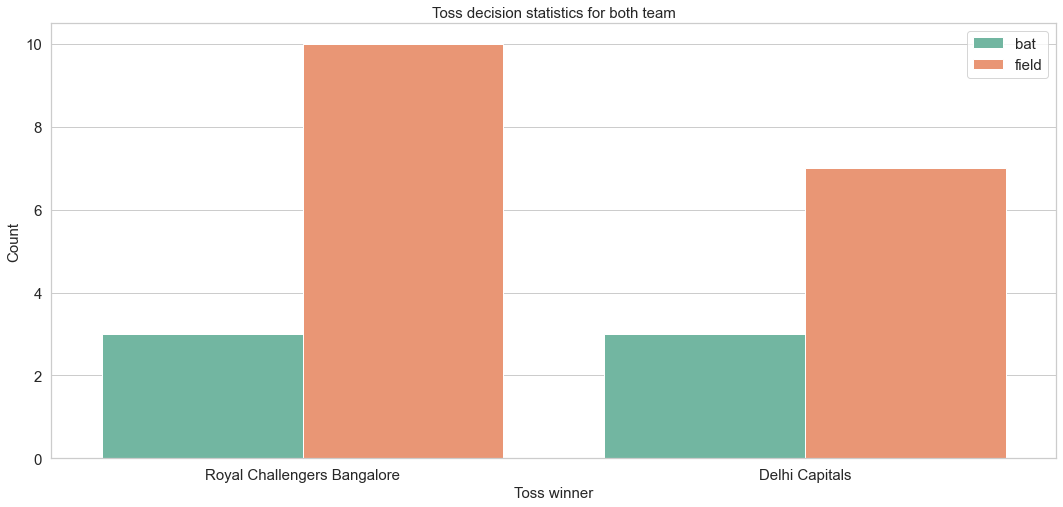

In [35]:
sns.set(style='whitegrid')
plt.figure(figsize = (18,8))
sns.countplot(RD['toss_winner'],palette='Set2',hue=RD['toss_decision'])
plt.title('Toss decision statistics for both team',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel('Toss winner',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.legend(loc='best',fontsize=15)
plt.show()

In [36]:
Toss_Decision_based_Winner = pd.DataFrame(RD.groupby(['toss_winner',"toss_decision","winner"])["winner"].count())

print(" No of times toss winning decision leading to match winning : ")
Toss_Decision_based_Winner

 No of times toss winning decision leading to match winning : 


winner
toss_winner                 toss_decision winner                             
Delhi Capitals              bat           Delhi Capitals                    2
                                          Royal Challengers Bangalore       1
                            field         Delhi Capitals                    3
                                          Royal Challengers Bangalore       4
Royal Challengers Bangalore bat           Delhi Capitals                    1
                                          Royal Challengers Bangalore       2
                            field         Delhi Capitals                    2
                                          Royal Challengers Bangalore       7

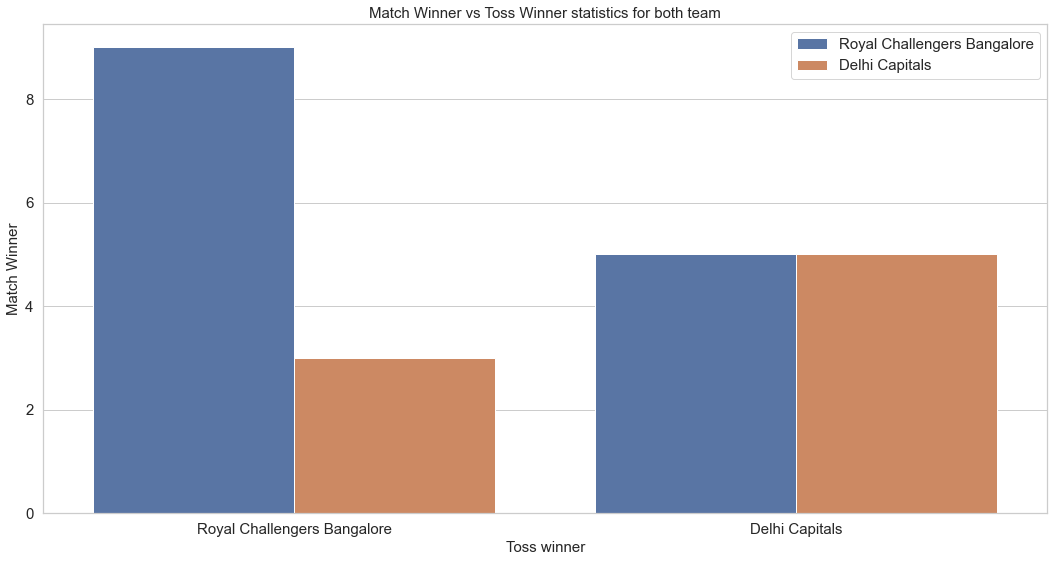

In [37]:
sns.set(style='whitegrid')
plt.figure(figsize = (18,9))
sns.countplot(RD['toss_winner'],hue=RD['winner'])
plt.title('Match Winner vs Toss Winner statistics for both team',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel('Toss winner',fontsize=15)
plt.ylabel('Match Winner',fontsize=15)
plt.legend(loc="best",fontsize=15)

### Toss Decision based Analysis of both the teams seperately :

In [38]:
RCB = RD[RD["toss_winner"]=="Royal Challengers Bangalore"]
DC = RD[RD["toss_winner"]=="Delhi Capitals"]

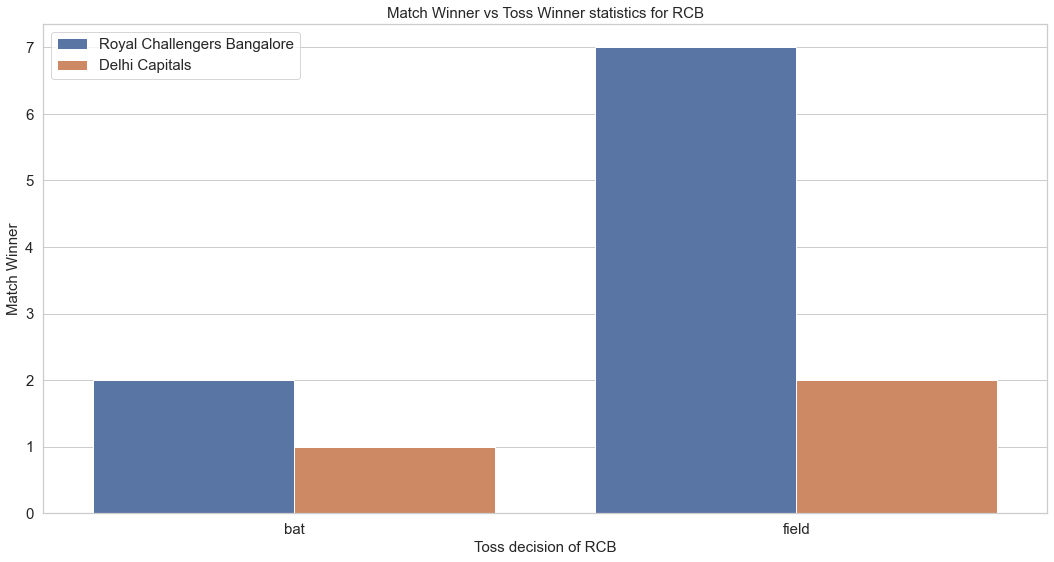

In [39]:
sns.set(style='whitegrid')
plt.figure(figsize = (18,9))
sns.countplot(RCB['toss_decision'],hue=RCB['winner'])
plt.title('Match Winner vs Toss Winner statistics for RCB',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel('Toss decision of RCB',fontsize=15)
plt.ylabel('Match Winner',fontsize=15)
plt.legend(loc="best",fontsize=15)

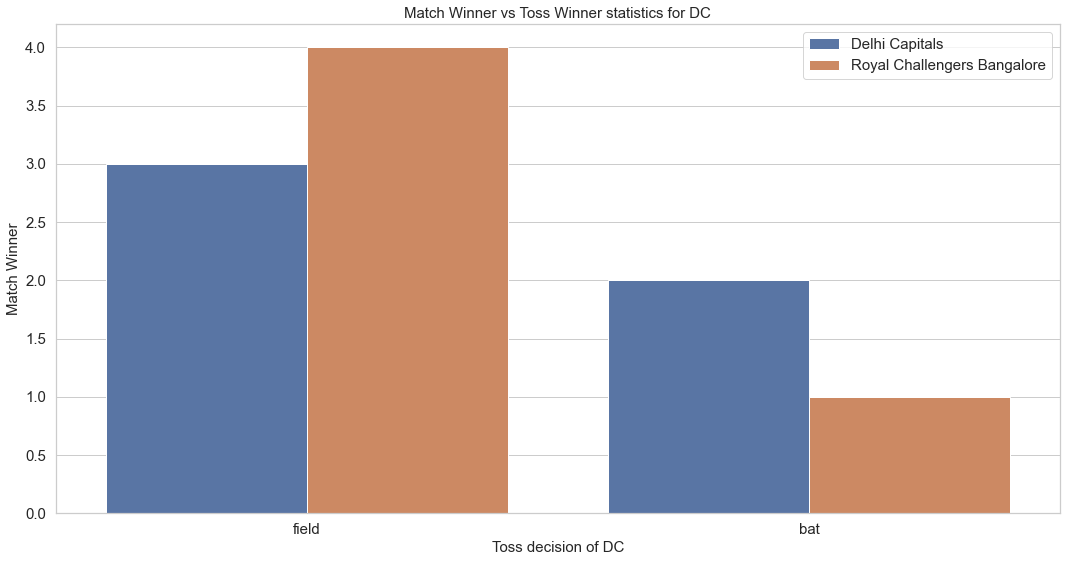

In [40]:
sns.set(style='whitegrid')
plt.figure(figsize = (18,9))
sns.countplot(DC['toss_decision'],hue=DC['winner'])
plt.title('Match Winner vs Toss Winner statistics for DC',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel('Toss decision of DC',fontsize=15)
plt.ylabel('Match Winner',fontsize=15)
plt.legend(loc="best",fontsize=15)

In [41]:
player_of_the_match = pd.DataFrame(RD.player_of_match.value_counts())

print("Man of the match :")

player_of_the_match

Man of the match :


,player_of_match
AB de Villiers,3
V Kohli,3
KM Jadhav,2
PD Collingwood,1
CH Gayle,1
K Rabada,1
JD Unadkat,1
TM Dilshan,1
SP Goswami,1
HV Patel,1


## Recent Year Performance Analysis

In [42]:
cond2 = RD["season"] == 2018
cond3 = RD["season"] == 2019
final = RD[cond2 | cond3]
final

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
id,,,,,,,,,,,,,,
7912,2018,Bengaluru,21/04/18,Delhi Capitals,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,6,AB de Villiers,M Chinnaswamy Stadium
7938,2018,Delhi,12/05/18,Delhi Capitals,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,5,AB de Villiers,Feroz Shah Kotla
11311,2019,Bengaluru,07/04/19,Royal Challengers Bangalore,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,4,K Rabada,M. Chinnaswamy Stadium
11337,2019,Delhi,28/04/19,Delhi Capitals,Royal Challengers Bangalore,Delhi Capitals,bat,normal,0,Delhi Capitals,16,0,S Dhawan,Feroz Shah Kotla Ground


In [43]:
final.shape

(4, 14)

In [44]:
player = pd.DataFrame(final.player_of_match.value_counts())

print("Man of the match :")
player

Man of the match :


,player_of_match
AB de Villiers,2
S Dhawan,1
K Rabada,1


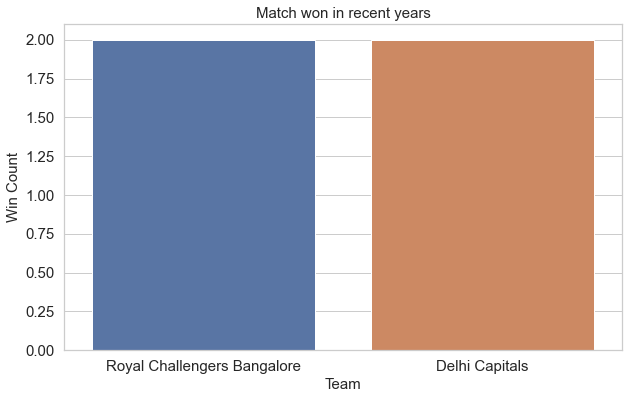

In [45]:
plt.figure(figsize = (10,6))
sns.countplot(final['winner'])
plt.title('Match won in recent years',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel('Team',fontsize=15)
plt.ylabel('Win Count',fontsize=15)

plt.show()

From all the above analysis related to Head to Head, Toss analysis,Performance Analysis, Recent year analysis etc we can predict that the team chasing the score will have better chances to win.